# More with the Definite Integral

$$\int_a^b f(x) dx = \lim_{n \to \infty}\sum_{i = 1}^n f(x_i^*) \Delta x$$

**WARM UP**

1. Evaluate the following definite integral.  Interpret the integral as an area, and describe the region with a graph.

$$\int_{0} ^4 8x^3 - x^2 dx$$

2. Suppose the function $8x^3 - x^2$ represents the velocity of a car in miles per hour at a time $x$.  Interpret the integral: $\int_{0} ^4 8x^3 - x^2 dx$

3. Suppose the function $8x^3 - x^2$ represents the rate at which water flows through a canal in ft$^3$.  Interpret the integral: $\int_{0} ^4 8x^3 - x^2 dx$.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### More Rules of Integrals

<table style="background-color: #f1f1c1" >
<tr>
   <td>$\displaystyle \int x^n dx = \frac{x^{n+1}}{n+1} + C$</td>
   <td>$\displaystyle \int e^{ax} dx = \frac{1}{a} e^{ax} + C$</td>
    <td>$\displaystyle \int \ln(x)dx = x\ln(x) - x + C$</td>
 </tr>
<tr>
    <td>$\displaystyle \int \sin(x) dx = -\cos(x) + C$</td>
    <td>$\displaystyle \int \cos(x) dx = \sin(x) + C$</td>
    <td>$\displaystyle \int a^x dx = \frac{a^x}{\ln a} + C$</td>
    </tr>

Your goal is to identify the appropriate rule to use for evaluating the given integral and then try to evaluate given definite integral.  Plot the results and interpret the answer as an area under the curve.

1. $\displaystyle \int_0^{3\pi} \sin(x) dx$

2. $\displaystyle \int_0^4 \cos(x) + x^2 dx$

3. $\displaystyle \int_1^{10} \ln(x) - 2^x + 4$

### Computing Solutions

We can use our computer to evaluate definite integrals.  Consider the definite integral:

$$\int_0^4 x^2 dx$$

In [2]:
import scipy.integrate as integrate

In [3]:
x = np.linspace(0, 4, 1000)
def f(x): return x**2

In [4]:
integrate.quad(f, 0, 4)

(21.333333333333336, 2.368475785867001e-13)

In [5]:
def f(x): return np.sin(x)

In [6]:
integrate.quad(f, 0, 2*np.pi)

(2.221501482512777e-16, 4.3998892617845996e-14)

### Pure Symbolic Computing

This is the other side of the coin from using something like a Riemann sum, and we are dealing with symbols as opposed to numbers here.  Accordingly, we introduce the symbolic representations using the library `SymPy` that is used for symbolic computing in Python.  

In [7]:
import sympy as sy

In [8]:
#define the symbol
x = sy.Symbol('x')

In [9]:
#define the function
def f(x): return x**2

In [10]:
#evaluate the integral 
#format is (function, (with respect to, start, stop))
sy.integrate(f(x), (x, 0, 4))

64/3

$$\int_2^5 x^3 - \cos(x) + \ln(x) - e^{4x}$$

In [11]:
##similar to with numbers(NumPy)
def f(x): return x**3 - sy.cos(x) + sy.log(x) + sy.exp(4*x)

In [12]:
sy.integrate(f(x), (x, 2, 5))

-exp(8)/4 - 2*log(2) + sin(2) - sin(5) + 5*log(5) + 597/4 + exp(20)/4

### Application I: Area Between Curves

Consider the functions $f(x) = x^2$ and $g(x) = \sqrt{x}$.  How might we compute the area between the curves?

<center>
    <img src = 'images/p8e1.png' />
    </center>

<script>
  (function(i,s,o,g,r,a,m){i['GoogleAnalyticsObject']=r;i[r]=i[r]||function(){
  (i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o),
  m=s.getElementsByTagName(o)[0];a.async=1;a.src=g;m.parentNode.insertBefore(a,m)
  })(window,document,'script','https://www.google-analytics.com/analytics.js','ga');

  ga('create', 'UA-50838873-3', 'auto');
  ga('send', 'pageview');

</script>

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Wealth Distribution

One way that we might understand equality is through understanding the distribution of wealth in a society.  Perfect wealth distribution would mean that all participants have the same share of wealth as everyone else.  We can represent this situation mathematically with a function $L(x) = x$ that we will call the **Lorenz Curve**. 

Concretely, if we were to look at every 20% of the population, we would see 20% of income.

| Fifths of Households | Percent of Wealth |
| -------------------  | -------------     |
| Lowest Fifth | 20 |
| Lowest two - Fifths | 40 |
| Lowest three - Fifths | 60 |
| Lowest four - Fifths | 80 |
| Lowest five - Fifths | 100 |



In [14]:
percent = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
lorenz = [0, 0.2, 0.4, 0.6, 0.8, 1.0]

Text(0.5, 1.0, 'Perfect Wealth Distribution')

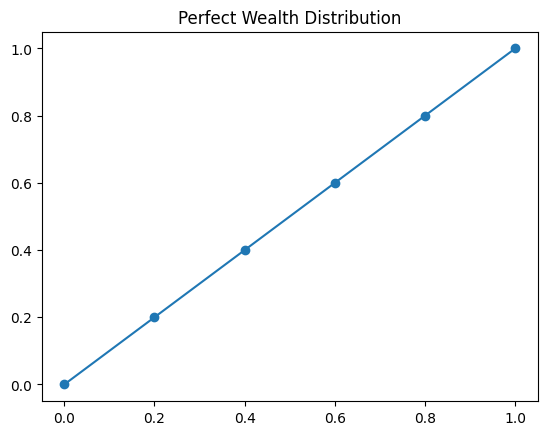

In [15]:
plt.plot(percent, lorenz, '-o')
plt.title("Perfect Wealth Distribution")

It is unlikely that we have perfect distribution of wealth in a society however.  For example, the following table describes the cumulative distribution of income in the United States for the year 1994.  

| Fifths of Households | Percent of Wealth |
| -------------------  | -------------     |
| Lowest Fifth | 4.2 |
| Lowest two - Fifths | 14.2 |
| Lowest three - Fifths | 29.9 |
| Lowest four - Fifths | 53.2 |
| Lowest five - Fifths | 100.0 |

In [16]:
usa_94 = [0, 0.042, 0.142, 0.299, 0.532, 1.00]

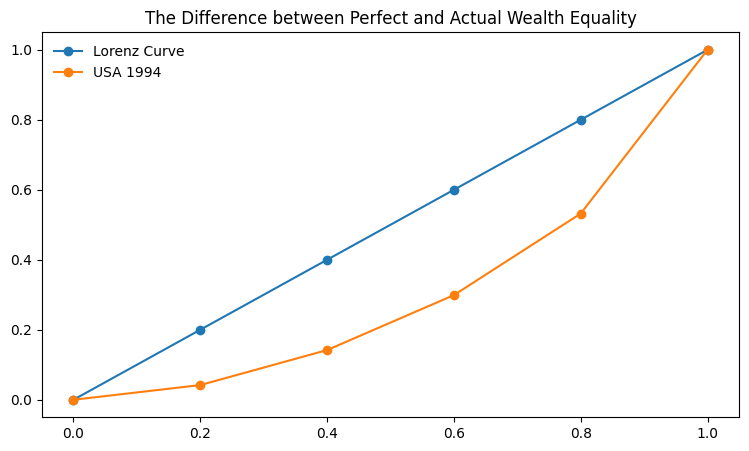

In [17]:
plt.figure(figsize = (9, 5))
plt.plot(percent, lorenz, '-o', label = 'Lorenz Curve')
plt.plot(percent, usa_94, '-o', label = 'USA 1994')
plt.title("The Difference between Perfect and Actual Wealth Equality")
plt.legend(loc = 'best', frameon = False)

The area between these curves can be understood to represent the discrepency between perfect wealth distribution and levels of inequality.  Further, if we examine the ratio between this area and that under the **Lorenz Curve** we get the **Gini Index**.  

One big issue remains however.  We don't want to use rectangles to approximate these regions but we don't have equations for the actual distribution of wealth.  We introduce two curve fitting techniques using `numpy` to address this problem.

### Census Bureau Data and Pandas

There are many organizations that use the Gini Index to this day.  The OECD, World Bank, and US Census all track Gini Indicies.  We want to investigate the real data much as we have with our smaller examples.  To do so, we will use the Pandas library.  

The table below gives distribution data for the years 1970, 1980, 1990, and 2000.  

| x | 0.0 | 0.2 | 0.4 | 0.6 | 0.8 | 1.0 |
| --- | --- | --- | --- | --- | --- | --- |
| 1970 | 0.000 | 0.041 | 0.149 | 0.323 | 0.568 | 1.000 |
| 1980 | 0.000 | 0.042 | 0.144 | 0.312 | 0.559 | 1.000 |
| 1990 | 0.000 | 0.038 | 0.134 | 0.293 | 0.530 | 1.000 |
| 2000 | 0.000 | 0.036 | 0.125 | 0.273 | 0.503 | 1.000 |

#### Creating the DataFrame

We will begin by creating a table from this data by entering lists with these values and creating a DataFrame from these lists.  



In [18]:
import pandas as pd
seventies = [0, 0.041, 0.149, 0.323, 0.568, 1.0]
eighties = [0, 0.042, 0.144, 0.312, 0.559, 1.0]
nineties = [0, 0.038, 0.134, 0.293, 0.53, 1.0]
twothou = [0, 0.036, 0.125, 0.273, 0.503, 1.0]

In [19]:
df = pd.DataFrame({'1970s': seventies, '1980s':eighties, '1990s': nineties,
                  '2000s': twothou, 'perfect': [0, 0.2, 0.4, 0.6, 0.8, 1.0]})
df.head()

,1970s,1980s,1990s,2000s,perfect
0,0.000,0.000,0.000,0.000,0.0
1,0.041,0.042,0.038,0.036,0.2
2,0.149,0.144,0.134,0.125,0.4
3,0.323,0.312,0.293,0.273,0.6
4,0.568,0.559,0.530,0.503,0.8


#### Plotting from the DataFrame

We can plot directly from the dataframe.  The default plot generates lines for each decades inequality distribution.  There are many plot types available however, and we can specify them with the `kind` argument as demonstrated with the density plot that follows. What do these visualizations tell you about equality in the USA based on this data?

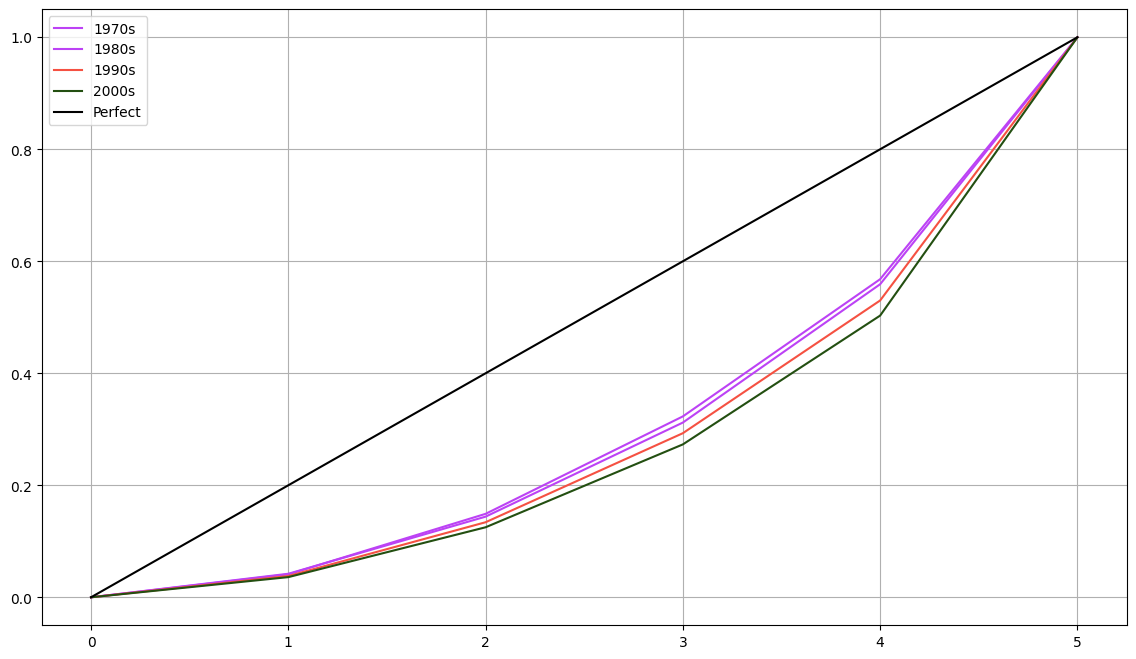

In [20]:
plt.figure(figsize = (14, 8))
plt.plot(df['1970s'], color = '#bc42f5', label  = '1970s')
plt.plot(df['1980s'], color = '#bc42f5', label = '1980s')
plt.plot(df['1990s'], color = '#f55142', label = '1990s')
plt.plot(df['2000s'], color = '#234f11', label = '2000s')
plt.plot(df['perfect'], color = 'black', label = 'Perfect')
plt.legend()
plt.grid()

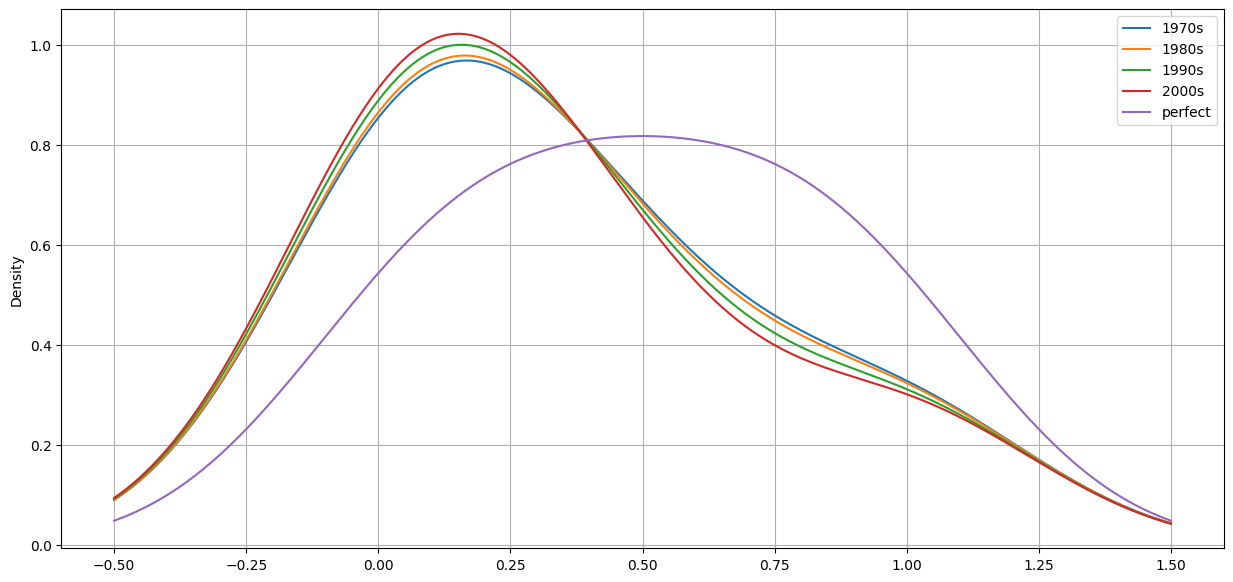

In [21]:
df.plot(kind = 'kde', figsize = (15, 7))
plt.grid()

### Volumes of Revolution

Find the volume of the solid formed by rotating the line $y = x^2$ around the $x$-axis from $x$ = 0 to $x = 1$.

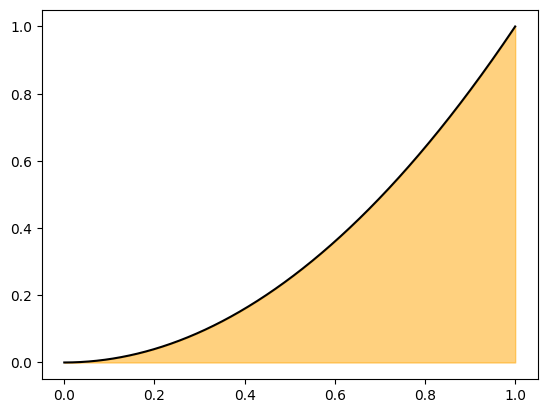

In [22]:
x = np.linspace(0, 1, 1000)
def f(x): return x**2
plt.plot(x, f(x), color = 'black')
plt.fill_between(x, f(x), color = 'orange', alpha = 0.5)

In [23]:
import mpl_toolkits.mplot3d.axes3d as axes3d

(-5.0, 5.0)

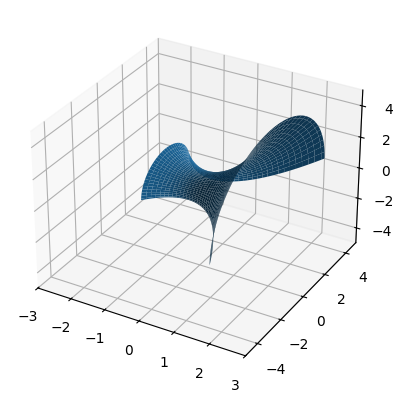

In [24]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection = '3d')

x = np.linspace(-1, 2, 70)
v = np.linspace(0, np.pi, 70)

U, V = np.meshgrid(x, v)
Y1 = (U**2 + 1)*np.cos(V)
Z1 = (U**2 + 1)*np.sin(V)
X = U
ax.plot_surface(X, Y1, Z1)
ax.set_xlim(-3,3)
ax.set_ylim(-5,5)
ax.set_zlim(-5,5)

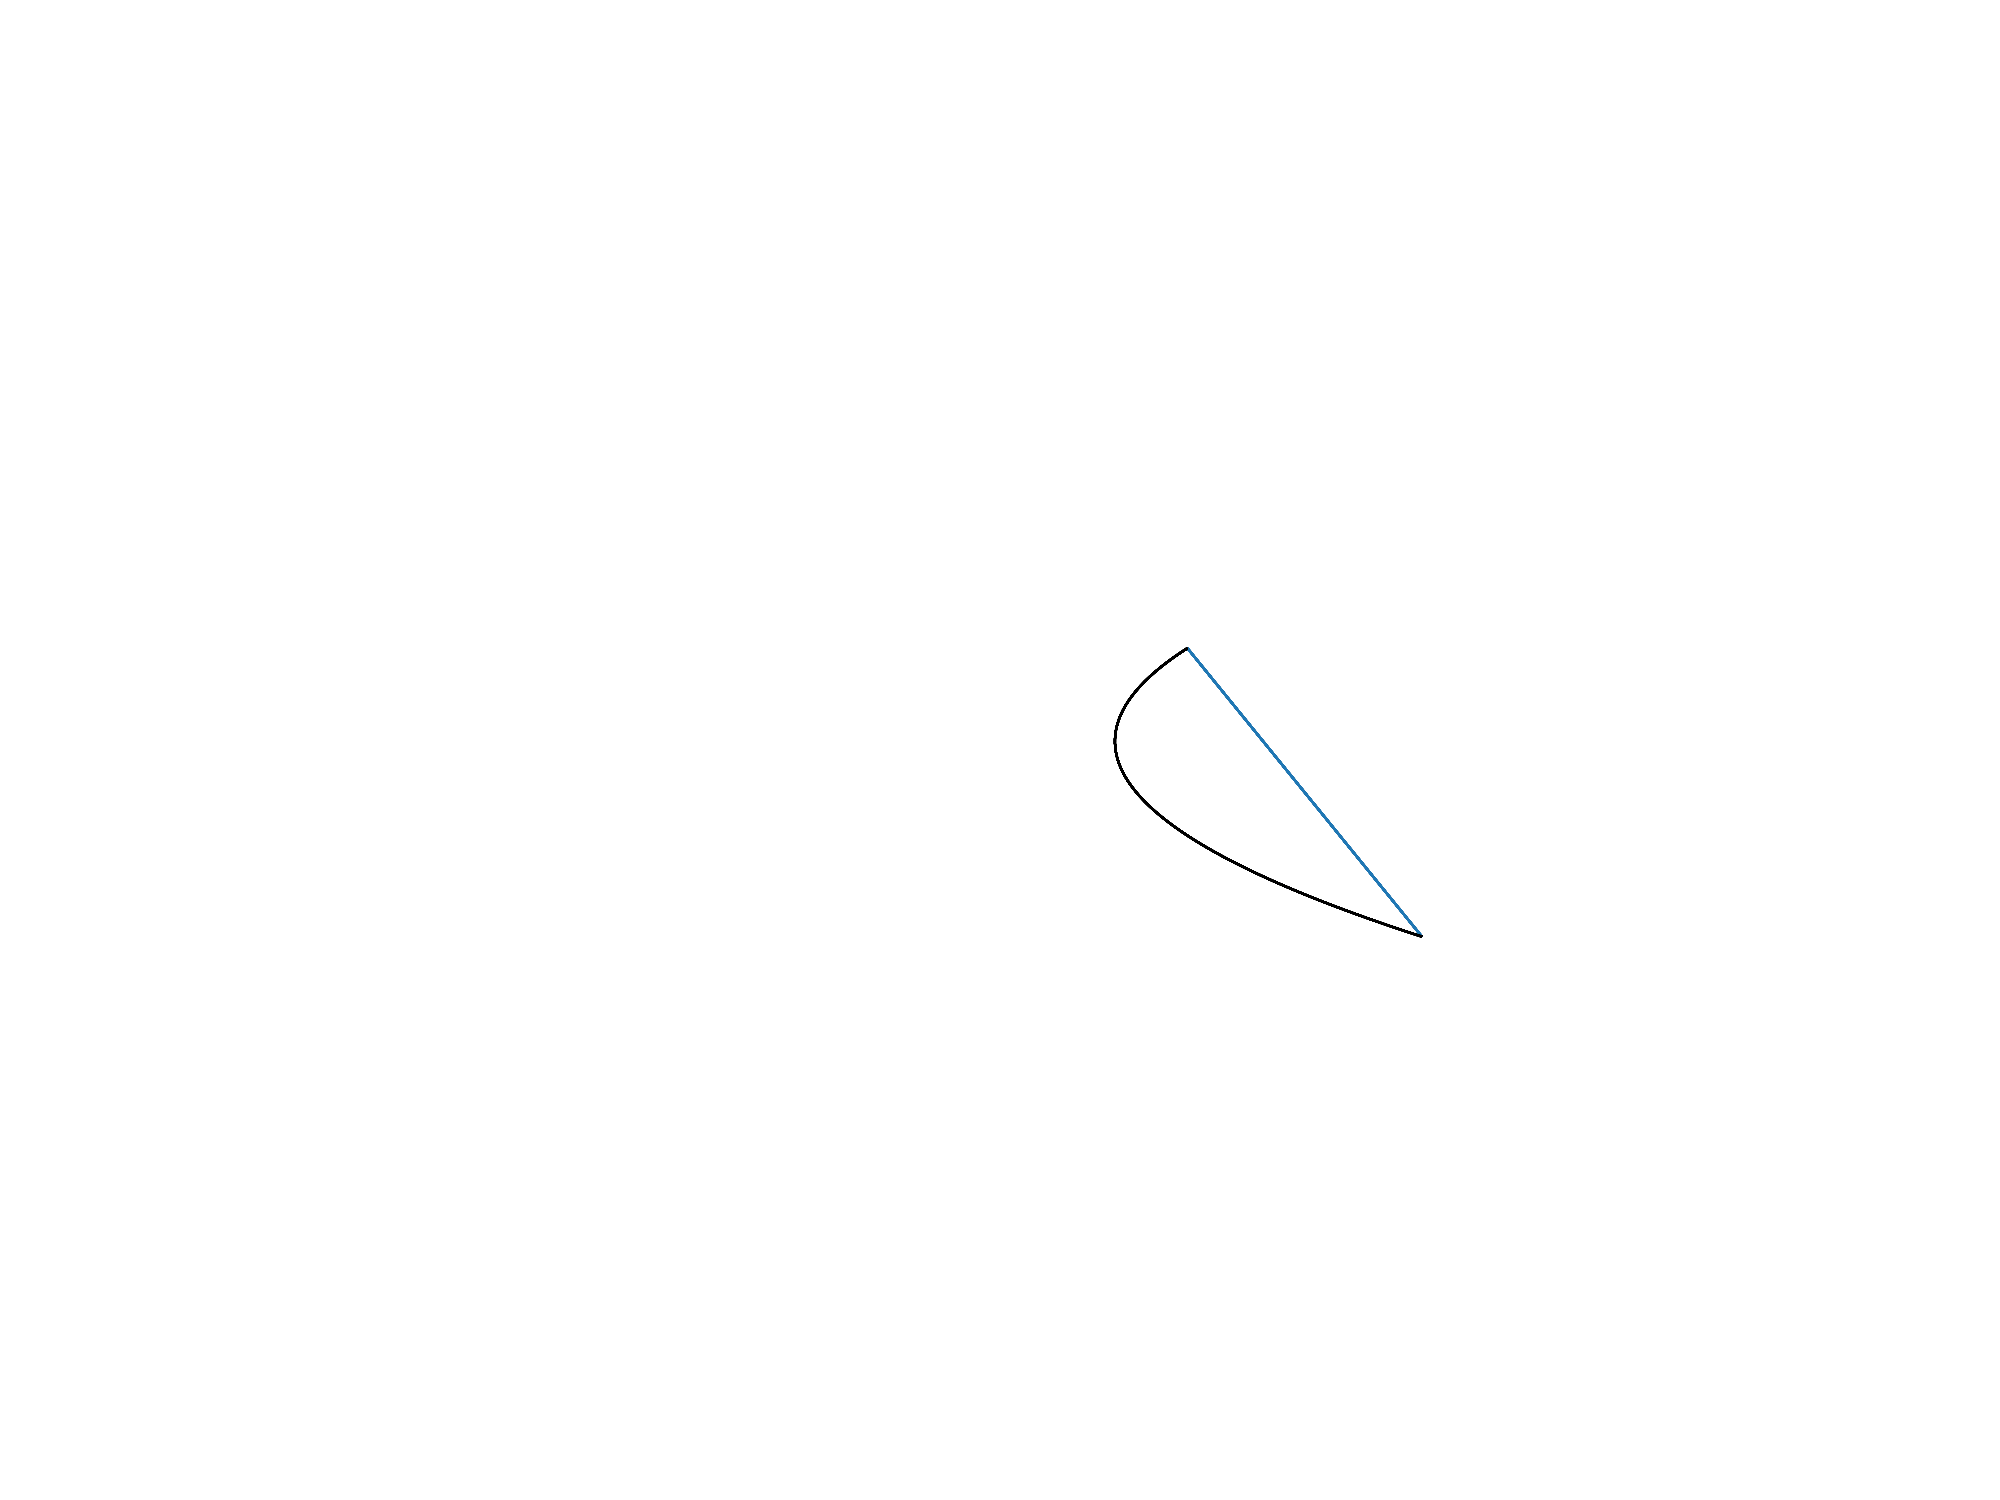

In [25]:
import gif

@gif.frame
def plot_volume(angle):
    fig = plt.figure(figsize = (20, 15))
    
    ax2 = fig.add_subplot(1, 1, 1, projection = '3d')
    angles = np.linspace(0, 360, 20)
    x = np.linspace(-1, 2, 60)
    v = np.linspace(0, 2*angle, 60)

    U, V = np.meshgrid(x, v)
    Y1 = (U**2 + 1)*np.cos(V)
    Z1 = (U**2 + 1)*np.sin(V)
    Y2 = (U + 3)*np.cos(V)
    Z2 = (U + 3)*np.sin(V)
    X = U
    ax2.plot_surface(X, Y1, Z1, alpha = 0.2, color = 'blue', rstride = 6, cstride = 6)
    ax2.plot_surface(X, Y2, Z2, alpha = 0.2, color = 'red', rstride = 6, cstride = 6)
    ax2.set_xlim(-3,3)
    ax2.set_ylim(-5,5)
    ax2.set_zlim(-5,5)
    ax2.view_init(elev = 50, azim = 30*angle)
    ax2.plot_wireframe(X, Y2, Z2)
    ax2.plot_wireframe(X, Y1, Z1, color = 'black')
    ax2._axis3don = False
    
frames = []
for i in np.linspace(0, 2*np.pi, 20):
    frame = plot_volume(i)
    frames.append(frame)
    
gif.save(frames, 'images/vol1.gif', duration = 500)

from IPython.display import Image

Image('images/vol1.gif')

In [26]:
def three_d_plotter(angle, rotate, turn):
    fig = plt.figure(figsize = (13, 6))
    ax = fig.add_subplot(1, 1, 1, projection='3d')

    u = np.linspace(-1, 2, 60)
    v = np.linspace(0, angle, 60)
    U, V = np.meshgrid(u, v)

    X = U
    Y1 = (U**2 + 1)*np.cos(V)
    Z1 = (U**2 + 1)*np.sin(V)

    Y2 = (U + 3)*np.cos(V)
    Z2 = (U + 3)*np.sin(V)

    ax.plot_surface(X, Y1, Z1, alpha=0.3, color='red', rstride=6, cstride=12)
    ax.plot_surface(X, Y2, Z2, alpha=0.3, color='blue', rstride=6, cstride=12)
    ax.plot_wireframe(X, Y2, Z2, alpha=0.3, color='blue', rstride=6, cstride=12)
    ax._axis3don = False
    ax.view_init(elev = rotate, azim = turn)

    plt.show()

In [27]:
from ipywidgets import interact
import ipywidgets as widgets

In [28]:
interact(three_d_plotter, angle = widgets.FloatSlider(0, min = 0, max = 2*np.pi, step = np.pi/10),
        rotate = widgets.FloatSlider(0, min = 0, max = 360, step = 5),
         turn = widgets.FloatSlider(0, min = 0, max = 500, step = 5))

interactive(children=(FloatSlider(value=0.0, description='angle', max=6.283185307179586, step=0.31415926535897…

<function __main__.three_d_plotter(angle, rotate, turn)>

**PROBLEM**

![](images/frq_area.png)

### A Creative Exercise

Definite Integral Art: Determining a beautiful region and its area.

In [29]:
from ipywidgets import interact
import ipywidgets as widgets
def fun_plotter(a, b, c, d, e):
    def f(x): return a*x**2 + b*np.sin(c*x - d*x**2) + e
    def g(x): return a*x**2 - b*np.sin(c*x - d*x**2) - e
    x = np.linspace(-2, 2, 1000)
    plt.figure(figsize = (15, 6))
    plt.plot(x, f(x), color = 'black')
    plt.plot(x, g(x), color = 'black')
    plt.fill_between(x, f(x), g(x), where = (f(x) > g(x)), color = 'green', alpha = 0.4)
    plt.fill_between(x, f(x), g(x), where = (f(x) < g(x)), color = 'purple', alpha = 0.4)

In [30]:
interact(fun_plotter, 
        a = widgets.IntSlider(1, min = -10, max = 10),
        b = widgets.IntSlider(1, min = -10, max = 10),
        c = widgets.IntSlider(1, min = -10, max = 10),
        d = widgets.IntSlider(1, min = -10, max = 10),
        e = widgets.IntSlider(1, min = -10, max = 10));

interactive(children=(IntSlider(value=1, description='a', max=10, min=-10), IntSlider(value=1, description='b'…

### Functions in Higher Dimensions

In [31]:
from mpl_toolkits.mplot3d import Axes3D

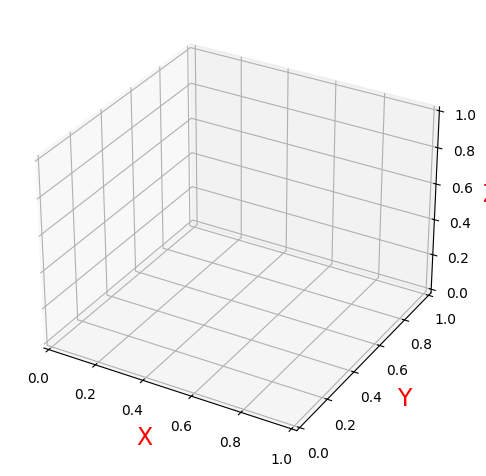

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.set_xlabel('X', fontsize = 17, color = 'red')
ax.set_ylabel('Y', fontsize = 17, color = 'red')
ax.set_zlabel('Z', fontsize = 17, color = 'red')
plt.tight_layout()

In [33]:
x = np.linspace(-3,3,100)
y = np.linspace(-3,3,100)
def f(x,y): return -(x**2 + y**2)

In [34]:
f(2, 4)

-20

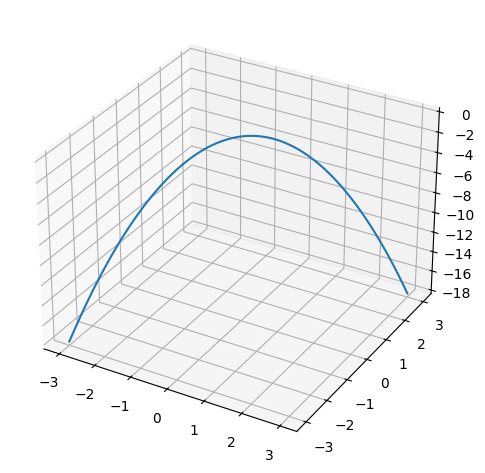

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.plot(x, y, f(x, y))
plt.tight_layout()

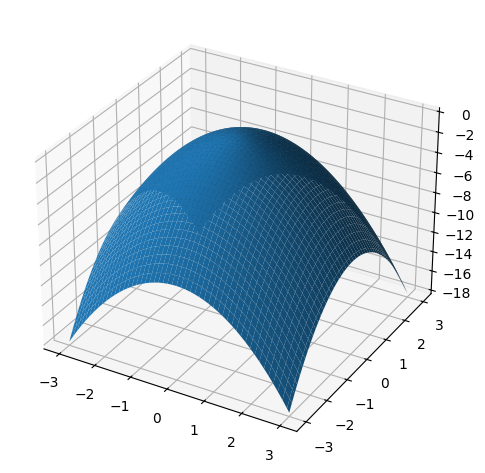

In [36]:
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(X, Y, Z)
plt.tight_layout()

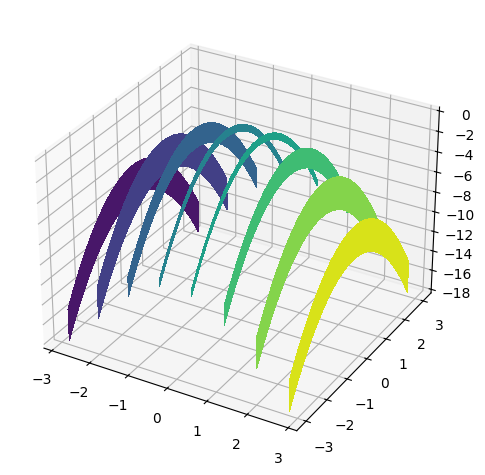

In [37]:
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.contourf(X, Y, Z, zdir = 'x')
plt.tight_layout()

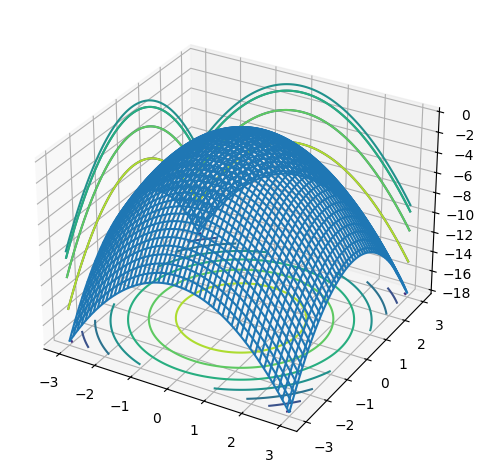

In [38]:
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.plot_wireframe(X, Y, Z)
ax.contour(X, Y, Z, zdir = 'x', offset = -3)
ax.contour(X, Y, Z, zdir = 'y', offset = 3)
ax.contour(X, Y, Z, zdir = 'z', offset = -18)
plt.tight_layout()

Text(0.5, 1.0, 'Heights of Rectangles on a Grid')

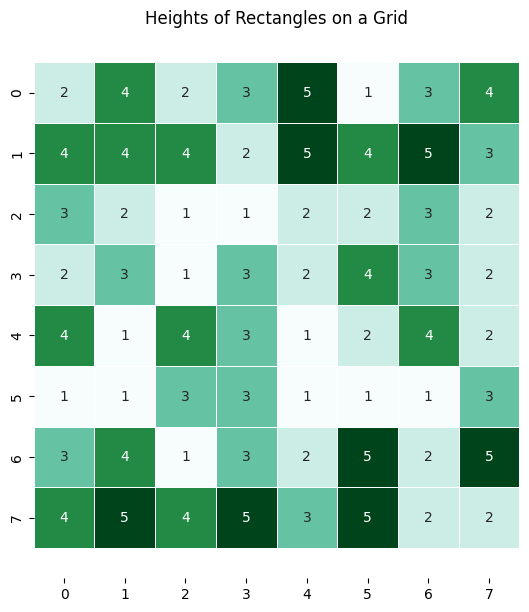

In [39]:
import seaborn as sns
grid = np.linspace(-3, 3, 10)
X, Y = np.meshgrid(grid, grid)
a = np.random.randint(1, 6, 64).reshape(8,8)
plt.figure(figsize = (6,6))
sns.heatmap(a, annot = True, 
            linewidths = 0.5, cmap="BuGn", 
            cbar = False, 
            square = True)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t)
plt.tight_layout()
plt.title('Heights of Rectangles on a Grid')

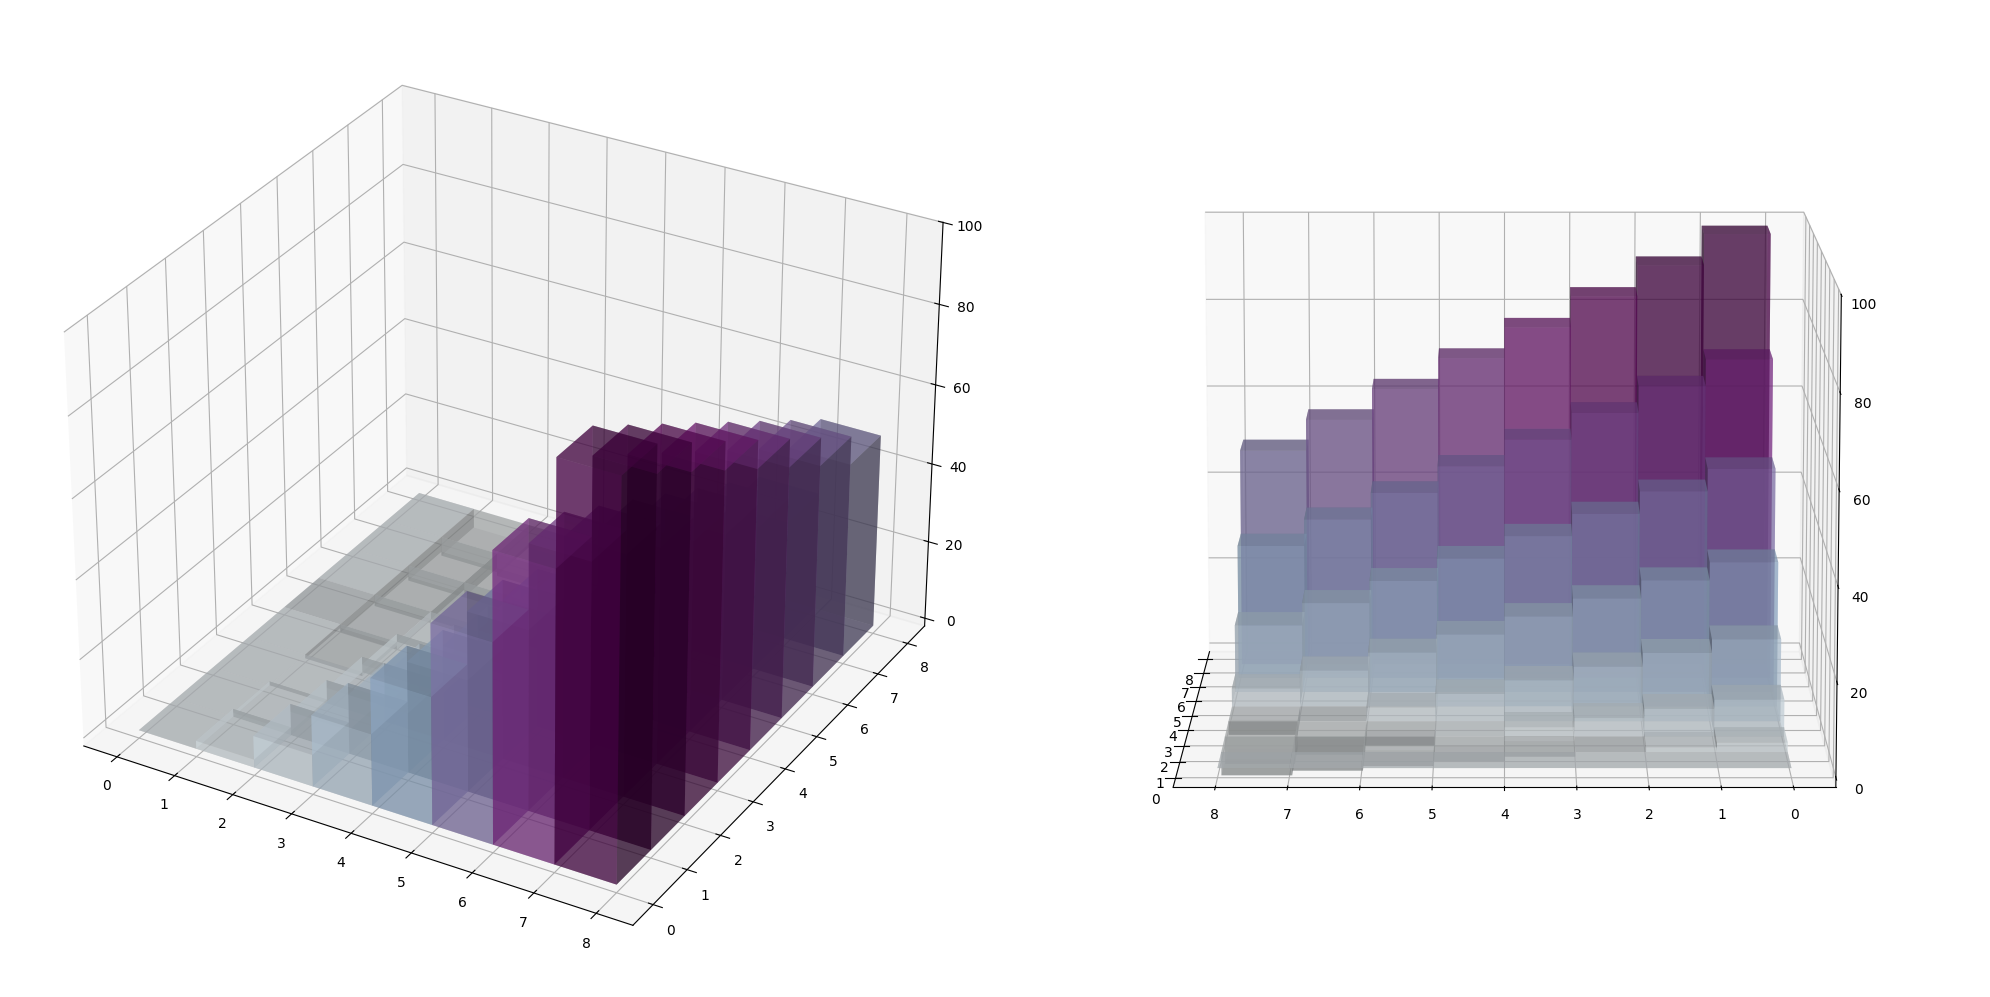

In [40]:
x = np.arange(8)
y = np.arange(8)
X, Y = np.meshgrid(x, y)
x, y = X.ravel(), Y.ravel()

top = 2*x**2 - x*y
bottom = np.zeros_like(top)
width = depth = 1


cmap = plt.get_cmap('BuPu')
l = min(top)
m = max(top)

fig = plt.figure(figsize = (20, 15))
ax = fig.add_subplot(121, projection = '3d')
ax.bar3d(x, y, bottom, width, depth, top, alpha = 0.5, color = [cmap((k - l)/m) for k in top])
plt.tight_layout()
ax = fig.add_subplot(122, projection = '3d')
ax.bar3d(x, y, bottom, width, depth, top, alpha = 0.5, color = [cmap((k - l)/m) for k in top])
ax.view_init(elev = 10., azim = 180)

# plt.tight_layout()

In [41]:
import ipywidgets as widgets
from ipywidgets import interact
def bar_approximator(elev, azim):
    fig = plt.figure(figsize = (20, 15))
    ax = fig.add_subplot(111, projection = '3d')
    ax.bar3d(x, y, bottom, width, depth, top, alpha = 0.5, color = [cmap((k - l)/m) for k in top])
    ax.view_init(elev = elev, azim = azim)

In [42]:
interact(bar_approximator, 
        elev = widgets.IntSlider(0, min = 0, max = 360),
        azim = widgets.IntSlider(0, min = 0, max = 360))

interactive(children=(IntSlider(value=0, description='elev', max=360), IntSlider(value=0, description='azim', …

<function __main__.bar_approximator(elev, azim)>

In [43]:
# x = np.linspace(0, 1, 100)
# def f(x): return x**2
# def g(x): return np.sqrt(x)

# fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (16, 6))
# ax[0].plot(x, f(x), color = 'black')
# ax[0].fill_between(x, f(x), color = 'orange', alpha = 0.6)
# ax[0].set_title('$f(x) = x^2$')

# ax[1].plot(x, g(x), color = 'black')
# ax[1].fill_between(x, g(x), color = 'green', alpha = 0.5)
# ax[1].set_title('$g(x) = \sqrt{x}$')

# ax[2].plot(x, g(x), color = 'black', label = '$g(x)$')
# ax[2].plot(x, f(x), linestyle = '--', color = 'black', label = '$f(x)$')
# ax[2].fill_between(x, f(x), g(x), color = 'yellow', alpha = 0.6)
# ax[2].fill_between(x, f(x), color = 'lightblue', alpha = 0.5)
# ax[2].legend()
# plt.savefig('images/p8e1.png')